<a href="https://colab.research.google.com/github/canoztas/testest/blob/main/dp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffprivlib
#!pip install pydp
#onehot encoding her biri için ayrı ayrı diff

     |████████████████████████████████| 167 kB 21.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 55.3 MB/s 
  Created wheel for crlibm: filename=crlibm-1.0.3-cp37-cp37m-linux_x86_64.whl size=175316 sha256=c273788b410d91c5808806e313eddc6c4f79efb19ee0916a846f17c9d7059751
  Stored in directory: /root/.cache/pip/wheels/d5/49/76/c2047e63fe9162b0b156dd4c0656b5ee1e3d8a2d6cfc56132c
Successfully built crlibm
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
"""
!pip install python-dp
from pydp.algorithms.laplacian import BoundedMean
from pydp.algorithms.laplacian import BoundedSum
dp_sum_original_dataset = BoundedSum(
    epsilon=1, lower_bound=min(X["sepal length (cm)"].to_list()), upper_bound=max(X["sepal length (cm)"].to_list()), dtype="float"
)
sum(X["sepal length (cm)"].to_list())
dp_sum_original_dataset.add_entries(X["sepal length (cm)"].to_list()) 
dp_sum_original_dataset.quick_result(X["sepal length (cm)"].to_list())https://github.com/opendp/smartnoise-samples/blob/master/whitepaper-demos/4-ml-dp-classifier.ipynb
"""

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import diffprivlib.models as dp
import numpy as np

In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [ ]:
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
digit = datasets.load_digits()
data = pd.DataFrame(data= np.c_[digit['data'], digit['target']],
                     columns= digit['feature_names'] + ['target'])

In [ ]:
mnist = pd.read_csv("sample_data/mnist_train_small.csv")


In [ ]:
adult = pd.read_csv("adult.csv")


In [ ]:
wine = pd.read_csv("winequality-red.csv",delimiter=';')

In [ ]:
wine = pd.read_csv("winequality-white.csv",delimiter=';')

In [ ]:
surg = pd.read_csv("Surgical-deepnet.csv")

In [ ]:
house = pd.read_csv("/content/sample_data/california_housing_train.csv")
house2 = pd.read_csv("/content/sample_data/california_housing_test.csv")
house = house.append(house2)

In [ ]:
adult = pd.read_csv("adult.csv")

In [ ]:
data = iris

In [ ]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
"""def scale(X,isPriv):

  if isPriv:
    scaler = dp.StandardScaler(bounds=(X.min(), X.max()))
  else:
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
  return(scaler.fit_transform(X))"""

In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
#iris

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

In [ ]:
y = y>y.mean() #for housing

In [ ]:
len(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.33,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
dplist =[]
normallist = []
for i in range(0,10000):
  nonprivate_clf = GaussianNB()
  nonprivate_clf.fit(X_train, y_train)
  y_pred = nonprivate_clf.predict(X_test)
  normallist.append(accuracy_score(y_test,y_pred)*100)

#cm=confusion_matrix(y_test,y_pred)



  dp_clf = dp.GaussianNB(epsilon=1, bounds=(X_train.min(), X_train.max()))
  dp_clf.fit(X_train, y_train)
  y_pred = dp_clf.predict(X_test)
  dplist.append(accuracy_score(y_test,y_pred)*100)
#cm=confusion_matrix(y_test,y_pred)


print(np.mean(normallist))
print(np.mean(dplist))


#print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

96.0
58.8412


In [ ]:
from sklearn.ensemble import RandomForestClassifier
dplist =[]
normallist = []
for i in range(0,10000):
  nonprivate_clf = RandomForestClassifier()
  nonprivate_clf.fit(X_train, y_train)
  y_pred = nonprivate_clf.predict(X_test)
  normallist.append(accuracy_score(y_test,y_pred)*100)

#cm=confusion_matrix(y_test,y_pred)



  dp_clf = dp.RandomForestClassifier(epsilon=1, bounds=(X_train.min(), X_train.max()))
  dp_clf.fit(X_train, y_train)
  y_pred = dp_clf.predict(X_test)
  dplist.append(accuracy_score(y_test,y_pred)*100)
#cm=confusion_matrix(y_test,y_pred)


print(np.mean(normallist))
print(np.mean(dplist))


#print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.7/dist-packages/diffprivlib/utils.py:86: DiffprivlibCompatibilityWarning: Parameter 'bounds' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  "warning.", DiffprivlibCompatibilityWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/utils.py:86: DiffprivlibCompatibilityWarning: Parameter 'bounds' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  "warning.", DiffprivlibCompatibilityWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: 

96.0822
79.9848


/usr/local/lib/python3.7/dist-packages/diffprivlib/utils.py:86: DiffprivlibCompatibilityWarning: Parameter 'bounds' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  "warning.", DiffprivlibCompatibilityWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression
dplist =[]
normallist = []
for i in range(0,10000):
  nonprivate_clf = LogisticRegression()
  nonprivate_clf.fit(X_train, y_train)
  y_pred = nonprivate_clf.predict(X_test)
  normallist.append(accuracy_score(y_test,y_pred)*100)

#cm=confusion_matrix(y_test,y_pred)



  dp_clf = dp.LogisticRegression(epsilon=1, bounds=(X_train.min(), X_train.max()))
  dp_clf.fit(X_train, y_train)
  y_pred = dp_clf.predict(X_test)
  dplist.append(accuracy_score(y_test,y_pred)*100)
#cm=confusion_matrix(y_test,y_pred)


print(np.mean(normallist))
print(np.mean(dplist))


#print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.7/dist-packages/diffprivlib/utils.py:86: DiffprivlibCompatibilityWarning: Parameter 'bounds' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  "warning.", DiffprivlibCompatibilityWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/utils.py:86: DiffprivlibCompatibilityWarning: Parameter 'bounds' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  "warning.", DiffprivlibCompatibilityWarning)
/usr/local/lib/python3.7/dist-packages/dif

92.0
38.5348


/usr/local/lib/python3.7/dist-packages/diffprivlib/utils.py:86: DiffprivlibCompatibilityWarning: Parameter 'bounds' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  "warning.", DiffprivlibCompatibilityWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/utils.py:86: DiffprivlibCompatibilityWarning: Parameter 'bounds' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  "warning.", DiffprivlibCompatibilityWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: Pri

In [ ]:
from sklearn.linear_model import LogisticRegression

nonprivate_clf = LogisticRegression()
nonprivate_clf.fit(X_train, y_train)
y_pred = nonprivate_clf.predict(X_test)

#cm=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred)*100)


dp_clf = dp.LogisticRegression(epsilon=1, bounds=(X_train.min(), X_train.max()))
dp_clf.fit(X_train, y_train)
y_pred = dp_clf.predict(X_test)
#cm=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred)*100)
#print(classification_report(y_test,y_pred))

#print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

51.70068027210885
33.08596165739023


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/diffprivlib/utils.py:86: DiffprivlibCompatibilityWarning: Parameter 'bounds' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  "warning.", DiffprivlibCompatibilityWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy lea

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
# Required parameters for DP version of Gaussian Naive Bayes

bounds = (X_train.min(), X_train.max())
batch_size = 10

silent = False

training_sizes = [1000, 5000, 10000, 15000, 1900]
epsilons = [0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]

results = np.zeros((len(training_sizes), len(epsilons)))

for i in range(0, len(training_sizes)):
        
    for j in range(0, len(epsilons)):
        
        batch_results = [0 for x in range(0, batch_size)]
        
        for batch in range(0, batch_size):
            X_train_sample, X_val, y_train_sample, y_test_val = train_test_split(X_train, y_train, train_size = training_sizes[i], stratify = y_train)
            
            clf = dp.GaussianNB(epsilon=epsilons[j], bounds=bounds)
           # clf = LogisticRegression(max_iter = 500, epsilon = epsilons[j])
            
            clf.fit(X_train_sample, y_train_sample)
            
            y_probs = clf.predict_proba(X_test)
            roc_score = roc_auc_score(y_test, y_probs, multi_class='ovo')
                        
            batch_results[batch] = roc_score
        
        results[i,j] = np.mean(batch_results)
        if silent == False:
            print('Training size: %i, ε: %.2f, auc score: %.2f' %(training_sizes[i], epsilons[j], results[i,j]))
         

Training size: 1000, ε: 0.05, auc score: 0.52
Training size: 1000, ε: 0.10, auc score: 0.51
Training size: 1000, ε: 0.20, auc score: 0.52
Training size: 1000, ε: 0.30, auc score: 0.50
Training size: 1000, ε: 0.50, auc score: 0.50
Training size: 1000, ε: 1.00, auc score: 0.52
Training size: 1000, ε: 2.00, auc score: 0.51
Training size: 1000, ε: 3.00, auc score: 0.53
Training size: 1000, ε: 4.00, auc score: 0.52
Training size: 1000, ε: 8.00, auc score: 0.54
Training size: 5000, ε: 0.05, auc score: 0.49
Training size: 5000, ε: 0.10, auc score: 0.49
Training size: 5000, ε: 0.20, auc score: 0.49
Training size: 5000, ε: 0.30, auc score: 0.51
Training size: 5000, ε: 0.50, auc score: 0.50
Training size: 5000, ε: 1.00, auc score: 0.52
Training size: 5000, ε: 2.00, auc score: 0.53
Training size: 5000, ε: 3.00, auc score: 0.57
Training size: 5000, ε: 4.00, auc score: 0.58
Training size: 5000, ε: 8.00, auc score: 0.68
Training size: 10000, ε: 0.05, auc score: 0.51
Training size: 10000, ε: 0.10, au

ValueError: ignored

Training size: 1000, ε: 0.05, auc score: 0.52
Training size: 1000, ε: 0.10, auc score: 0.51
Training size: 1000, ε: 0.20, auc score: 0.52
Training size: 1000, ε: 0.30, auc score: 0.50
Training size: 1000, ε: 0.50, auc score: 0.50
Training size: 1000, ε: 1.00, auc score: 0.52
Training size: 1000, ε: 2.00, auc score: 0.51
Training size: 1000, ε: 3.00, auc score: 0.53
Training size: 1000, ε: 4.00, auc score: 0.52
Training size: 1000, ε: 8.00, auc score: 0.54
Training size: 5000, ε: 0.05, auc score: 0.49
Training size: 5000, ε: 0.10, auc score: 0.49
Training size: 5000, ε: 0.20, auc score: 0.49
Training size: 5000, ε: 0.30, auc score: 0.51
Training size: 5000, ε: 0.50, auc score: 0.50
Training size: 5000, ε: 1.00, auc score: 0.52
Training size: 5000, ε: 2.00, auc score: 0.53
Training size: 5000, ε: 3.00, auc score: 0.57
Training size: 5000, ε: 4.00, auc score: 0.58
Training size: 5000, ε: 8.00, auc score: 0.68
Training size: 10000, ε: 0.05, auc score: 0.51
Training size: 10000, ε: 0.10, auc score: 0.53
Training size: 10000, ε: 0.20, auc score: 0.51
Training size: 10000, ε: 0.30, auc score: 0.51
Training size: 10000, ε: 0.50, auc score: 0.52
Training size: 10000, ε: 1.00, auc score: 0.52
Training size: 10000, ε: 2.00, auc score: 0.58
Training size: 10000, ε: 3.00, auc score: 0.59
Training size: 10000, ε: 4.00, auc score: 0.68
Training size: 10000, ε: 8.00, auc score: 0.75
Training size: 15000, ε: 0.05, auc score: 0.51
Training size: 15000, ε: 0.10, auc score: 0.52
Training size: 15000, ε: 0.20, auc score: 0.50
Training size: 15000, ε: 0.30, auc score: 0.50
Training size: 15000, ε: 0.50, auc score: 0.53
Training size: 15000, ε: 1.00, auc score: 0.57
Training size: 15000, ε: 2.00, auc score: 0.64
Training size: 15000, ε: 3.00, auc score: 0.68
Training size: 15000, ε: 4.00, auc score: 0.72
Training size: 15000, ε: 8.00, auc score: 0.80

In [ ]:
from sklearn.ensemble  import RandomForestClassifier

nonprivate_clf = RandomForestClassifier()
nonprivate_clf.fit(X_train, y_train)
y_pred = nonprivate_clf.predict(X_test)
#cm=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred)*100)
#print("Non-private test accuracy: %.2f%%" % (nonprivate_clf.score(X_test, y_test) * 100))


dp_clf = dp.RandomForestClassifier(epsilon=1)
dp_clf.fit(X_train, y_train)
y_pred = dp_clf.predict(X_test)
#cm=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred)*100)
#print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

In [ ]:
len(X_train)

In [ ]:
# Required parameters for DP version of

bounds = (X_train.min(), X_train.max())
batch_size = 10

silent = False

training_sizes = [600, 1000, 3000, 5000, 7500, 10000]


epsilons = [0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]

results = np.zeros((len(training_sizes), len(epsilons)))

for i in range(0, len(training_sizes)):
        
    for j in range(0, len(epsilons)):
        
        batch_results = [0 for x in range(0, batch_size)]
        
        for batch in range(0, batch_size):
            X_train_sample, X_val, y_train_sample, y_test_val = train_test_split(X_train, y_train, train_size = training_sizes[i], stratify = y_train)
            
            clf = dp.GaussianNB(epsilon=epsilons[j], bounds=bounds)

           # clf = LogisticRegression(max_iter = 500, epsilon = epsilons[j])
            
            clf.fit(X_train_sample, y_train_sample)
            
            y_probs = clf.predict(X_test)
            #roc_score = roc_auc_score(y_test, y_probs, multi_class='ovo')
            roc_score = accuracy_score(y_test,y_probs)*100            
            batch_results[batch] = roc_score
        
        results[i,j] = np.mean(batch_results)
        if silent == False:
            print('Training size: %i, ε: %.2f, auc score: %.2f' %(training_sizes[i], epsilons[j], results[i,j]))
            test = 'Training size: %i, ε: %.2f, acu score: %.2f' %(training_sizes[i], epsilons[j], results[i,j]) + "\n" + classification_report(y_test,y_pred)
            with open("gnbmnist.txt", "a") as file_object:
              file_object.write(test)

      

Training size: 1000, ε: 0.05, auc score: 9.78
Training size: 1000, ε: 0.10, auc score: 9.31
Training size: 1000, ε: 0.20, auc score: 9.14
Training size: 1000, ε: 0.30, auc score: 9.79
Training size: 1000, ε: 0.50, auc score: 11.07
Training size: 1000, ε: 1.00, auc score: 10.21
Training size: 1000, ε: 2.00, auc score: 10.51
Training size: 1000, ε: 3.00, auc score: 9.92
Training size: 1000, ε: 4.00, auc score: 10.65
Training size: 1000, ε: 8.00, auc score: 11.61
Training size: 5000, ε: 0.05, auc score: 11.12
Training size: 5000, ε: 0.10, auc score: 10.56
Training size: 5000, ε: 0.20, auc score: 8.77
Training size: 5000, ε: 0.30, auc score: 9.80
Training size: 5000, ε: 0.50, auc score: 9.04
Training size: 5000, ε: 1.00, auc score: 11.41
Training size: 5000, ε: 2.00, auc score: 11.40
Training size: 5000, ε: 3.00, auc score: 11.81
Training size: 5000, ε: 4.00, auc score: 13.63
Training size: 5000, ε: 8.00, auc score: 22.22
Training size: 10000, ε: 0.05, auc score: 10.53
Training size: 10000

ValueError: ignored

In [ ]:
len(X)

In [ ]:
X

In [ ]:
# Required parameters for DP version of

bounds = (X_train.min(), X_train.max())
batch_size = 10

silent = False

#training_sizes = [400, 800, 1000, 1500 ,2500, 3800]
training_sizes = [1000, 3000, 5000, 7500, 10000,15000]

epsilons = [0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]

results = np.zeros((len(training_sizes), len(epsilons)))

for i in range(0, len(training_sizes)):
        
    for j in range(0, len(epsilons)):
        
        batch_results = [0 for x in range(0, batch_size)]
        
        for batch in range(0, batch_size):
            X_train_sample, X_val, y_train_sample, y_test_val = train_test_split(X_train, y_train, train_size = training_sizes[i], stratify = y_train)
            
            clf = dp.GaussianNB(epsilon=epsilons[j], bounds=bounds)

           # clf = LogisticRegression(max_iter = 500, epsilon = epsilons[j])
            
            clf.fit(X_train_sample, y_train_sample)
            
            y_probs = clf.predict(X_test)
            #roc_score = roc_auc_score(y_test, y_probs, multi_class='ovo')
            roc_score = accuracy_score(y_test,y_probs)*100            
            batch_results[batch] = roc_score
        
        results[i,j] = np.mean(batch_results)
        if silent == False:
            print('Training size: %i, ε: %.2f, auc score: %.2f' %(training_sizes[i], epsilons[j], results[i,j]))
            test = '%i, %.2f, %.2f' %(training_sizes[i], epsilons[j], results[i,j]) + "\n" #+ classification_report(y_test,y_pred)
            with open("gnbhouse.txt", "a") as file_object:
              file_object.write(test)

      

Training size: 1000, ε: 0.05, auc score: 57.85
Training size: 1000, ε: 0.10, auc score: 50.54
Training size: 1000, ε: 0.20, auc score: 56.46
Training size: 1000, ε: 0.30, auc score: 51.69
Training size: 1000, ε: 0.50, auc score: 55.30
Training size: 1000, ε: 1.00, auc score: 60.33
Training size: 1000, ε: 2.00, auc score: 60.81
Training size: 1000, ε: 3.00, auc score: 65.79
Training size: 1000, ε: 4.00, auc score: 69.30
Training size: 1000, ε: 8.00, auc score: 68.43
Training size: 3000, ε: 0.05, auc score: 55.17
Training size: 3000, ε: 0.10, auc score: 53.56
Training size: 3000, ε: 0.20, auc score: 58.01
Training size: 3000, ε: 0.30, auc score: 53.07
Training size: 3000, ε: 0.50, auc score: 61.38
Training size: 3000, ε: 1.00, auc score: 65.80
Training size: 3000, ε: 2.00, auc score: 68.57
Training size: 3000, ε: 3.00, auc score: 66.81
Training size: 3000, ε: 4.00, auc score: 67.46
Training size: 3000, ε: 8.00, auc score: 67.28
Training size: 5000, ε: 0.05, auc score: 53.07
Training size

In [ ]:
len(toGraph)

In [ ]:
toGraph["a"][0]

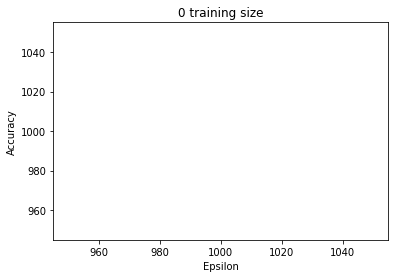

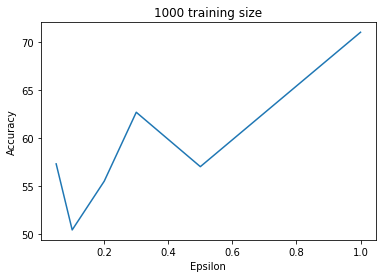

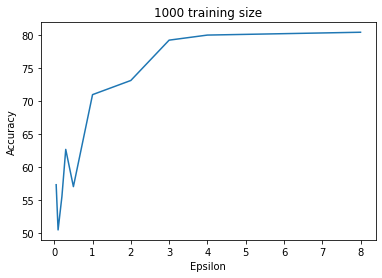

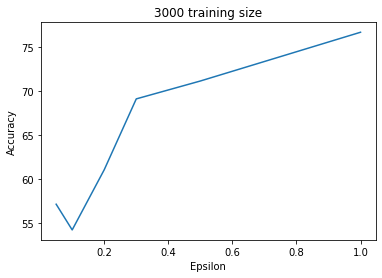

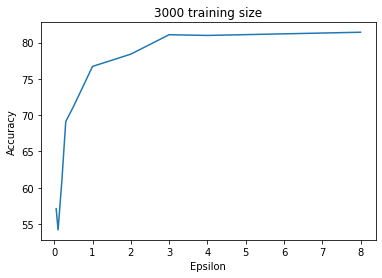

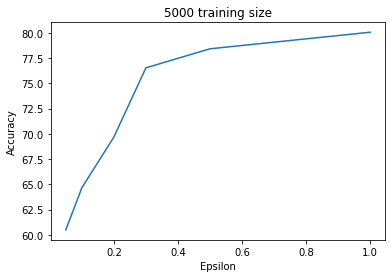

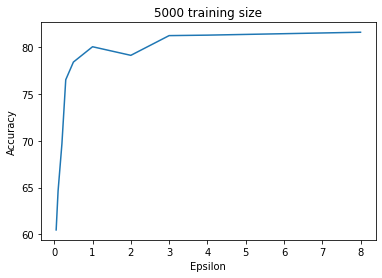

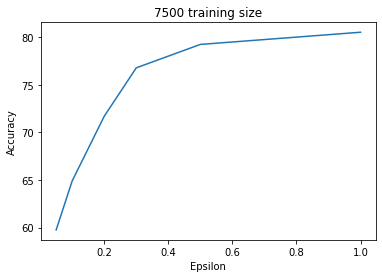

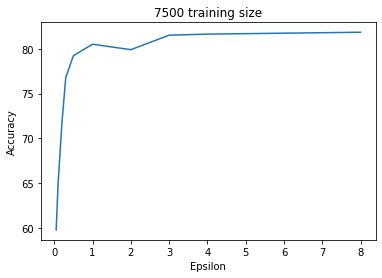

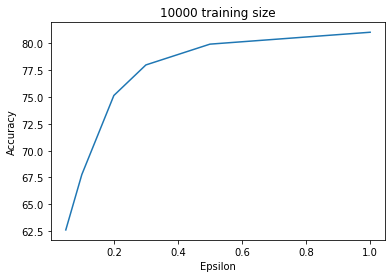

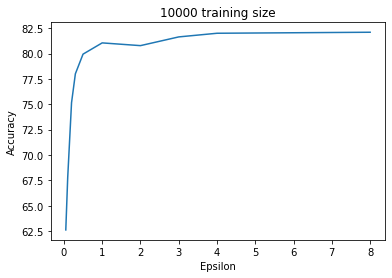

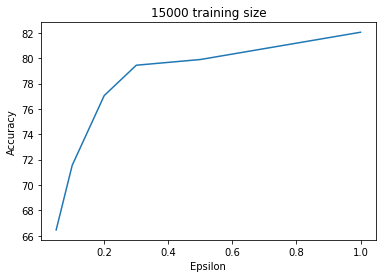

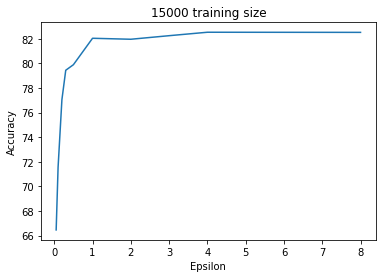

In [ ]:
import matplotlib.pyplot as plt
toGraph = pd.read_csv("lojreghouse.txt",names=["a","b","c"])
toPrintX = []
toPrintY = []
last = 0
toPrintX.append(toGraph["a"][1])
toPrintY.append(toGraph["a"][2])
for index,row in toGraph.iterrows():
  if row["a"]==last:
    toPrintX.append(float(row["b"]))
    toPrintY.append(float(row["c"]))
    last = row["a"]

  else:
    plt.plot(toPrintX,toPrintY)
    plt.title(str(int(last)) + " training size")
    plt.xlabel("Epsilon")
    plt.ylabel("Accuracy")
    plt.show()
    toPrintX.clear()
    toPrintY.clear()
    toPrintX.append(row["b"])
    toPrintY.append(row["c"])
    last = row["a"]

  if index == len(toGraph)-1:
    plt.plot(toPrintX,toPrintY)
    plt.title(str(int(last)) + " training size")
    plt.xlabel("Epsilon")
    plt.ylabel("Accuracy")
    plt.show()
  if int(row["b"])==1:
    plt.plot(toPrintX,toPrintY)
    plt.title(str(int(last)) + " training size")
    plt.xlabel("Epsilon")
    plt.ylabel("Accuracy")
    plt.show()
  if index == 0:
    toPrintX.append(float(row["b"]))
    toPrintY.append(float(row["c"]))
    last = row["a"]


  


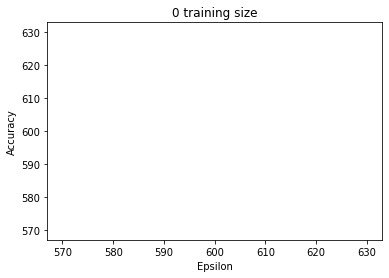

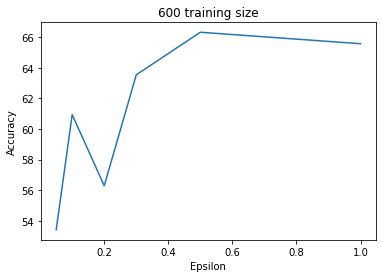

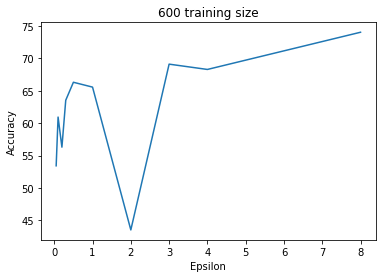

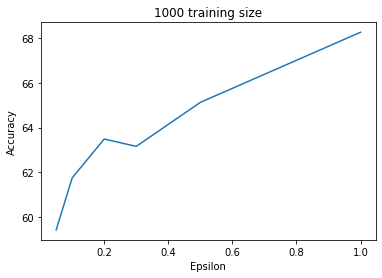

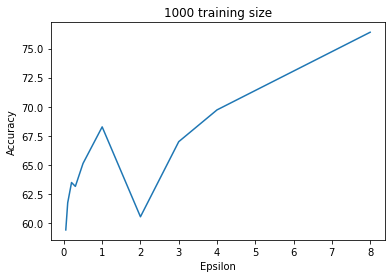

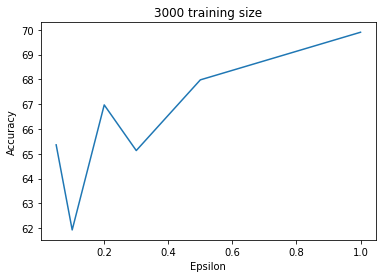

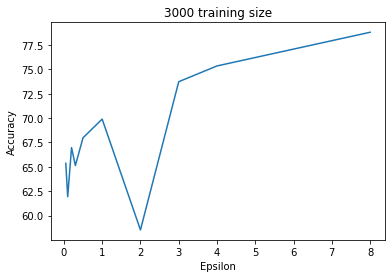

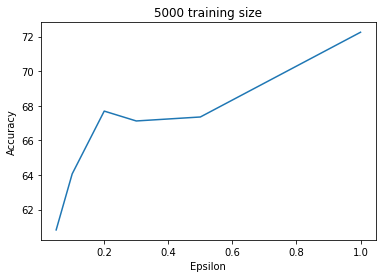

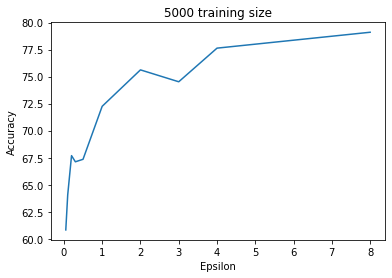

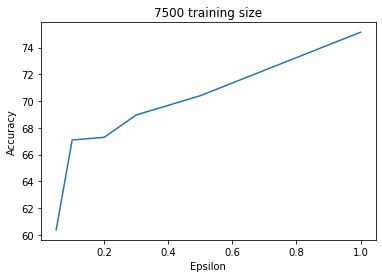

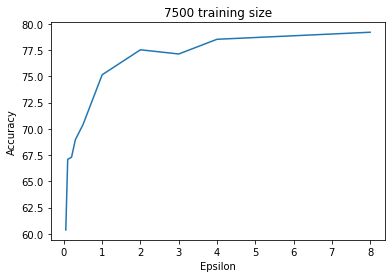

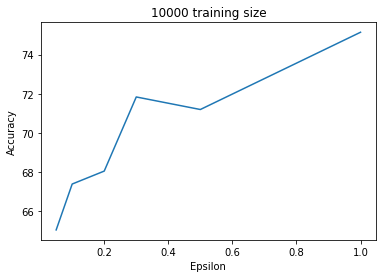

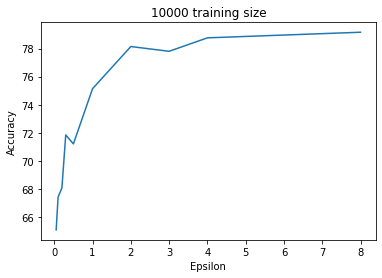

In [ ]:
import matplotlib.pyplot as plt
toGraph = pd.read_csv("lojregsurg.txt",names=["a","b","c"])
toPrintX = []
toPrintY = []
last = 0
toPrintX.append(toGraph["a"][1])
toPrintY.append(toGraph["a"][2])
for index,row in toGraph.iterrows():
  if row["a"]==last:
    toPrintX.append(float(row["b"]))
    toPrintY.append(float(row["c"]))
    last = row["a"]

  else:
    plt.plot(toPrintX,toPrintY)
    plt.title(str(int(last)) + " training size")
    plt.xlabel("Epsilon")
    plt.ylabel("Accuracy")
    plt.show()
    toPrintX.clear()
    toPrintY.clear()
    toPrintX.append(row["b"])
    toPrintY.append(row["c"])
    last = row["a"]

  if index == len(toGraph)-1:
    plt.plot(toPrintX,toPrintY)
    plt.title(str(int(last)) + " training size")
    plt.xlabel("Epsilon")
    plt.ylabel("Accuracy")
    plt.show()
  if int(row["b"])==1:
    plt.plot(toPrintX,toPrintY)
    plt.title(str(int(last)) + " training size")
    plt.xlabel("Epsilon")
    plt.ylabel("Accuracy")
    plt.show()
  if index == 0:
    toPrintX.append(float(row["b"]))
    toPrintY.append(float(row["c"]))
    last = row["a"]


  


In [ ]:
# Required parameters for DP version of

bounds = (X_train.min(), X_train.max())
batch_size = 10

silent = False

#training_sizes = [400, 800, 1000, 1200]
#training_sizes = [100]
training_sizes = [1000, 3000, 5000, 7500, 10000,15000]



epsilons = [0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]

results = np.zeros((len(training_sizes), len(epsilons)))

for i in range(0, len(training_sizes)):
        
    for j in range(0, len(epsilons)):
        
        batch_results = [0 for x in range(0, batch_size)]
        
        for batch in range(0, batch_size):
            X_train_sample, X_val, y_train_sample, y_test_val = train_test_split(X_train, y_train, train_size = training_sizes[i], stratify = y_train)
            
            clf = dp.RandomForestClassifier(epsilon=epsilons[j])
           # clf = LogisticRegression(max_iter = 500, epsilon = epsilons[j])
            
            clf.fit(X_train_sample, y_train_sample)
            
            y_probs = clf.predict(X_test)
            #roc_score = roc_auc_score(y_test, y_probs, multi_class='ovo')
            roc_score = accuracy_score(y_test,y_probs)*100            
            batch_results[batch] = roc_score
        
        results[i,j] = np.mean(batch_results)
        if silent == False:
            print('Training size: %i, ε: %.2f, auc score: %.2f' %(training_sizes[i], epsilons[j], results[i,j]))
            test = 'Training size: %i, ε: %.2f, auc score: %.2f' %(training_sizes[i], epsilons[j], results[i,j]) + "\n" #+ classification_report(y_test,y_pred)
            with open("randomforesthouse.txt", "a") as file_object:
              file_object.write(test)

      

/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 1000, ε: 0.05, auc score: 60.53


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 1000, ε: 0.10, auc score: 60.25


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 1000, ε: 0.20, auc score: 62.61


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 1000, ε: 0.30, auc score: 61.05


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 1000, ε: 0.50, auc score: 61.91


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 1000, ε: 1.00, auc score: 62.83


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 1000, ε: 2.00, auc score: 62.06


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 1000, ε: 3.00, auc score: 63.07


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 1000, ε: 4.00, auc score: 62.14


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 1000, ε: 8.00, auc score: 62.97


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 3000, ε: 0.05, auc score: 61.68


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 3000, ε: 0.10, auc score: 61.54


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 3000, ε: 0.20, auc score: 62.17


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 3000, ε: 0.30, auc score: 62.73


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 3000, ε: 0.50, auc score: 61.49


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 3000, ε: 1.00, auc score: 63.30


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 3000, ε: 2.00, auc score: 62.77


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 3000, ε: 3.00, auc score: 61.20


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 3000, ε: 4.00, auc score: 62.20


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 3000, ε: 8.00, auc score: 61.85


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 5000, ε: 0.05, auc score: 62.56


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 5000, ε: 0.10, auc score: 63.01


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 5000, ε: 0.20, auc score: 61.79


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 5000, ε: 0.30, auc score: 62.47


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 5000, ε: 0.50, auc score: 61.20


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 5000, ε: 1.00, auc score: 61.16


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 5000, ε: 2.00, auc score: 62.74


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 5000, ε: 3.00, auc score: 61.04


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 5000, ε: 4.00, auc score: 61.68


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 5000, ε: 8.00, auc score: 61.31


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 7500, ε: 0.05, auc score: 61.87


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 7500, ε: 0.10, auc score: 61.00


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 7500, ε: 0.20, auc score: 62.80


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 7500, ε: 0.30, auc score: 62.61


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 7500, ε: 0.50, auc score: 61.84


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 7500, ε: 1.00, auc score: 61.78


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 7500, ε: 2.00, auc score: 62.21


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 7500, ε: 3.00, auc score: 62.17


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 7500, ε: 4.00, auc score: 61.23


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 7500, ε: 8.00, auc score: 61.26


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 10000, ε: 0.05, auc score: 61.00


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 10000, ε: 0.10, auc score: 62.76


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 10000, ε: 0.20, auc score: 61.42


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 10000, ε: 0.30, auc score: 61.00


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 10000, ε: 0.50, auc score: 61.83


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 10000, ε: 1.00, auc score: 60.95


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 10000, ε: 2.00, auc score: 62.14


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 10000, ε: 3.00, auc score: 61.23


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 10000, ε: 4.00, auc score: 63.04


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 10000, ε: 8.00, auc score: 61.72


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 15000, ε: 0.05, auc score: 61.07


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 15000, ε: 0.10, auc score: 60.90


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 15000, ε: 0.20, auc score: 61.43


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 15000, ε: 0.30, auc score: 62.72


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 15000, ε: 0.50, auc score: 62.41


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 15000, ε: 1.00, auc score: 61.67


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 15000, ε: 2.00, auc score: 61.88


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 15000, ε: 3.00, auc score: 61.48


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 15000, ε: 4.00, auc score: 62.62


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:193: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additio

Training size: 15000, ε: 8.00, auc score: 61.19


In [ ]:
# Required parameters for DP version of

bounds = (X_train.min(), X_train.max())
batch_size = 10

silent = False

training_sizes = [1000, 3000, 5000, 7500, 10000,15000]

#training_sizes = [100]

epsilons = [0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]

results = np.zeros((len(training_sizes), len(epsilons)))

for i in range(0, len(training_sizes)):
        
    for j in range(0, len(epsilons)):
        
        batch_results = [0 for x in range(0, batch_size)]
        
        for batch in range(0, batch_size):
            X_train_sample, X_val, y_train_sample, y_test_val = train_test_split(X_train, y_train, train_size = training_sizes[i], stratify = y_train)
            
            #clf = dp.RandomForestClassifier(epsilon=epsilons[j],)
            clf = dp.LogisticRegression(max_iter = 500, epsilon = epsilons[j])
            
            clf.fit(X_train_sample, y_train_sample)
            
            y_probs = clf.predict(X_test)
            #roc_score = roc_auc_score(y_test, y_probs, multi_class='ovo')
            roc_score = accuracy_score(y_test,y_probs)*100            
            batch_results[batch] = roc_score
        
        results[i,j] = np.mean(batch_results)
        if silent == False:
            print('Training size: %i, ε: %.2f, auc score: %.2f' %(training_sizes[i], epsilons[j], results[i,j]))
            test = 'Training size: %i, ε: %.2f, auc score: %.2f' %(training_sizes[i], epsilons[j], results[i,j]) + "\n" #+ classification_report(y_test,y_pred)
            with open("lojreghouse.txt", "a") as file_object:
              file_object.write(test)

      

Training size: 1000, ε: 0.05, auc score: 57.33


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 1000, ε: 0.10, auc score: 50.47


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 1000, ε: 0.20, auc score: 55.53


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 1000, ε: 0.30, auc score: 62.69
Training size: 1000, ε: 0.50, auc score: 57.04


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 1000, ε: 1.00, auc score: 71.00


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 1000, ε: 2.00, auc score: 73.15


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 1000, ε: 3.00, auc score: 79.27
Training size: 1000, ε: 4.00, auc score: 80.04


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 1000, ε: 8.00, auc score: 80.47


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 3000, ε: 0.05, auc score: 57.11


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 3000, ε: 0.10, auc score: 54.18


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 3000, ε: 0.20, auc score: 61.04


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 3000, ε: 0.30, auc score: 69.12


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 3000, ε: 0.50, auc score: 71.16


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 3000, ε: 1.00, auc score: 76.72


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 3000, ε: 2.00, auc score: 78.41


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 3000, ε: 3.00, auc score: 81.09


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 3000, ε: 4.00, auc score: 80.99


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 3000, ε: 8.00, auc score: 81.43


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 5000, ε: 0.05, auc score: 60.48


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 5000, ε: 0.10, auc score: 64.65


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 5000, ε: 0.20, auc score: 69.68


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 5000, ε: 0.30, auc score: 76.54


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 5000, ε: 0.50, auc score: 78.43


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 5000, ε: 1.00, auc score: 80.07


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 5000, ε: 2.00, auc score: 79.15


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 5000, ε: 3.00, auc score: 81.26


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 5000, ε: 4.00, auc score: 81.31


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 5000, ε: 8.00, auc score: 81.62


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 7500, ε: 0.05, auc score: 59.75


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 7500, ε: 0.10, auc score: 64.90


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 7500, ε: 0.20, auc score: 71.69


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 7500, ε: 0.30, auc score: 76.78


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 7500, ε: 0.50, auc score: 79.24


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 7500, ε: 1.00, auc score: 80.52


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 7500, ε: 2.00, auc score: 79.91


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 7500, ε: 3.00, auc score: 81.53


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 7500, ε: 4.00, auc score: 81.65


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 7500, ε: 8.00, auc score: 81.86


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 10000, ε: 0.05, auc score: 62.61


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 10000, ε: 0.10, auc score: 67.77


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 10000, ε: 0.20, auc score: 75.15


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 10000, ε: 0.30, auc score: 78.00


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 10000, ε: 0.50, auc score: 79.94


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 10000, ε: 1.00, auc score: 81.05


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 10000, ε: 2.00, auc score: 80.78


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 10000, ε: 3.00, auc score: 81.64


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 10000, ε: 4.00, auc score: 82.00


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 10000, ε: 8.00, auc score: 82.10


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 15000, ε: 0.05, auc score: 66.46


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 15000, ε: 0.10, auc score: 71.55


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 15000, ε: 0.20, auc score: 77.05


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 15000, ε: 0.30, auc score: 79.44


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 15000, ε: 0.50, auc score: 79.89


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 15000, ε: 1.00, auc score: 82.04


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 15000, ε: 2.00, auc score: 81.96


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 15000, ε: 3.00, auc score: 82.25


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 15000, ε: 4.00, auc score: 82.53


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated 

Training size: 15000, ε: 8.00, auc score: 82.52


In [ ]:
X_train_sample, X_val, y_train_sample, y_test_val = train_test_split(X_train, y_train, train_size = 1000, stratify = y_train)

In [ ]:
epsilons = [0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]
for j in range(0, len(epsilons)):
  clf = dp.RandomForestClassifier(epsilon=epsilons[j])


In [ ]:
# Required parameters for DP version of Gaussian Naive Bayes

bounds = (X_train.min(), X_train.max())
batch_size = 10

silent = False

training_sizes = [1000, 5000, 10000, 15000, 1900]
training_sizes = [100]

epsilons = [0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]

results = np.zeros((len(training_sizes), len(epsilons)))

for i in range(0, len(training_sizes)):
        
    for j in range(0, len(epsilons)):
        
        batch_results = [0 for x in range(0, batch_size)]
        
        for batch in range(0, batch_size):
            X_train_sample, X_val, y_train_sample, y_test_val = train_test_split(X_train, y_train, train_size = training_sizes[i], stratify = y_train)
            
            clf = dp.GaussianNB(epsilon=epsilons[j], bounds=bounds)
           # clf = LogisticRegression(max_iter = 500, epsilon = epsilons[j])
            
            clf.fit(X_train_sample, y_train_sample)
            
            y_probs = clf.predict_proba(X_test)
            score = accuracy_score(y_test,y_pred)*100
                        
            batch_results[batch] = score
        
        results[i,j] = np.mean(batch_results)
        if silent == False:
            print('Training size: %i, ε: %.2f, accuracy score: %.2f' %(training_sizes[i], epsilons[j], results[i,j]))
         

Training size: 100, ε: 0.05, accuracy score: 56.67
Training size: 100, ε: 0.10, accuracy score: 56.67
Training size: 100, ε: 0.20, accuracy score: 56.67
Training size: 100, ε: 0.30, accuracy score: 56.67
Training size: 100, ε: 0.50, accuracy score: 56.67
Training size: 100, ε: 1.00, accuracy score: 56.67
Training size: 100, ε: 2.00, accuracy score: 56.67
Training size: 100, ε: 3.00, accuracy score: 56.67
Training size: 100, ε: 4.00, accuracy score: 56.67


KeyboardInterrupt: ignored

In [ ]:
X_test.index

Int64Index([11003,  4981, 16642,  8595, 19161,   230,  3148,  9398, 19678,
             1624,
            ...
             5521, 15576, 16275, 12250, 17050, 12610, 14916, 11512,  8643,
             8780],
           dtype='int64', length=4000)

In [ ]:
# Required parameters for DP version of Gaussian Naive Bayes

bounds = (X_train.min(), X_train.max())
batch_size = 10

silent = False

training_sizes = [1000, 5000, 10000, 15000, 1900]
epsilons = [0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]

results = np.zeros((len(training_sizes), len(epsilons)))

for i in range(0, len(training_sizes)):
        
    for j in range(0, len(epsilons)):
        
        batch_results = [0 for x in range(0, batch_size)]
        
        for batch in range(0, batch_size):
            X_train_sample, X_val, y_train_sample, y_test_val = train_test_split(X_train, y_train, train_size = training_sizes[i], stratify = y_train)
            
            clf = dp.RandomForestClassifier(epsilon=epsilons[j], bounds=bounds)
           # clf = LogisticRegression(max_iter = 500, epsilon = epsilons[j])
            
            clf.fit(X_train_sample, y_train_sample)
            
            y_probs = clf.predict(X_test.index.reshape(1,-1))
            score = accuracy_score(y_test,y_pred)*100
                        
            batch_results[batch] = score
        
        results[i,j] = np.mean(batch_results)
        if silent == False:
            print('Training size: %i, ε: %.2f, accuracy score: %.2f' %(training_sizes[i], epsilons[j], results[i,j]))
         

/usr/local/lib/python3.7/dist-packages/diffprivlib/utils.py:86: DiffprivlibCompatibilityWarning: Parameter 'bounds' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  "warning.", DiffprivlibCompatibilityWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/forest.py:194: PrivacyLeakWarning: `feature_domains` parameter hasn't been specified, so falling back to determining domains from the data.
This may result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `feature_domains` according to the documentation
  PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression

nonprivate_clf = LogisticRegression(solver="lbfgs",max_iter=500)
nonprivate_clf.fit(X_train, y_train)
print("Non-private test accuracy: %.2f%%" % (nonprivate_clf.score(X_test, y_test) * 100))

dp_clf = dp.LogisticRegression(epsilon=1, max_iter=500, data_norm=20)
dp_clf.fit(X_train, y_train)
print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

Non-private test accuracy: 95.55%
Differentially private test accuracy (epsilon=1.00): 14.90%


asd

In [ ]:
len(X)

In [ ]:
from sklearn.cluster import KMeans
nonpriv_score = []
priv_score = []
nonpriv_inertia = []
priv_inertia = []
cluster = []
RANGE_MAX = len(X)
for i in range(1,RANGE_MAX):
  nonprivate_cls = KMeans(n_clusters=i)
  nonprivate_cls.fit(X)
  nonpriv_score.append(nonprivate_cls.score(X))
  nonpriv_inertia.append(nonprivate_cls.inertia_)
#print("Non-private test accuracy: %.2f%%" % (nonprivate_clf.score(X_test, y_test) ))


  dp_cls = dp.KMeans(n_clusters=i,bounds=(X.min(), X.max()))
  dp_cls.fit(X)
  priv_score.append(dp_cls.score(X))
  priv_inertia.append(dp_cls.inertia_)
  if i%5==0:
    print(i)
  cluster.append(i)
#print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % (dp_clf.epsilon, dp_clf.score(X_test, y_test)))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
mms = MinMaxScaler()

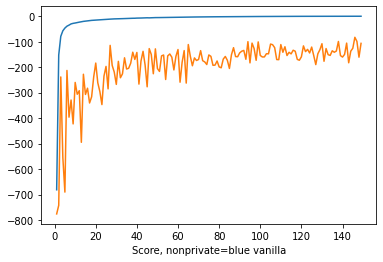

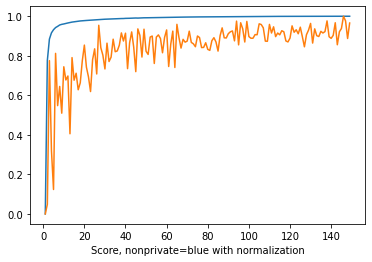

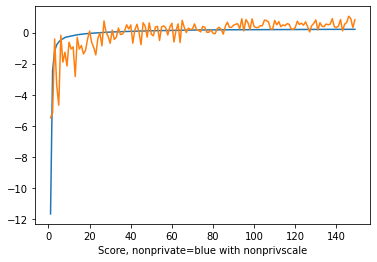

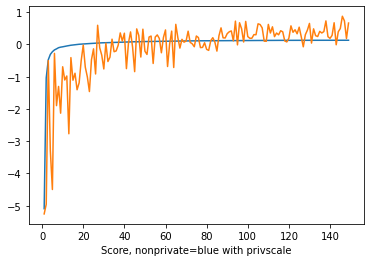

In [ ]:
plt.plot(cluster,nonpriv_score)
plt.plot(cluster,priv_score)
plt.xlabel("Score, nonprivate=blue vanilla")
plt.show()
plt.plot(cluster,mms.fit_transform(pd.DataFrame(nonpriv_score)))
plt.plot(cluster,mms.fit_transform(pd.DataFrame(priv_score)))
plt.xlabel("Score, nonprivate=blue with normalization")
plt.show()
plt.plot(cluster,scale(pd.DataFrame(nonpriv_score),False))
plt.plot(cluster,scale(pd.DataFrame(priv_score),False))
plt.xlabel("Score, nonprivate=blue with nonprivscale")
plt.show()
plt.plot(cluster,scale(pd.DataFrame(nonpriv_score),True))
plt.plot(cluster,scale(pd.DataFrame(priv_score),True))
plt.xlabel("Score, nonprivate=blue with privscale")
plt.show()

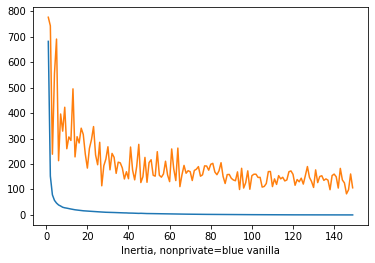

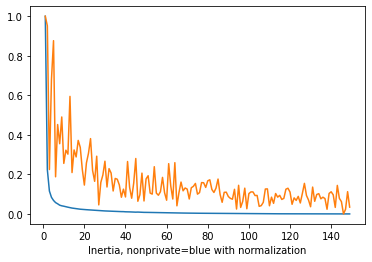

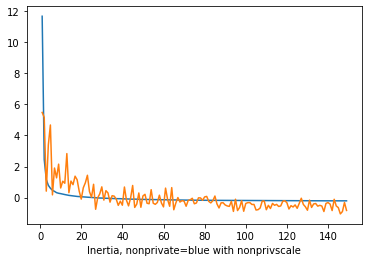

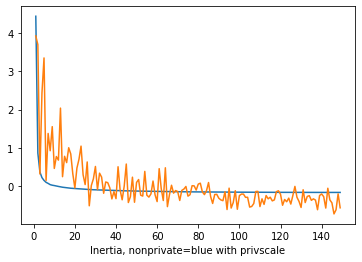

In [ ]:
plt.plot(cluster,nonpriv_inertia)
plt.plot(cluster,priv_inertia)
plt.xlabel("Inertia, nonprivate=blue vanilla")
plt.show()
plt.plot(cluster,mms.fit_transform(pd.DataFrame(nonpriv_inertia)))
plt.plot(cluster,mms.fit_transform(pd.DataFrame(priv_inertia)))
plt.xlabel("Inertia, nonprivate=blue with normalization")
plt.show()
plt.plot(cluster,scale(pd.DataFrame(nonpriv_inertia),False))
plt.plot(cluster,scale(pd.DataFrame(priv_inertia),False))
plt.xlabel("Inertia, nonprivate=blue with nonprivscale")
plt.show()
plt.plot(cluster,scale(pd.DataFrame(nonpriv_inertia),True))
plt.plot(cluster,scale(pd.DataFrame(priv_inertia),True))
plt.xlabel("Inertia, nonprivate=blue with privscale")
plt.show()

In [ ]:
X = data.iloc[:, :-1]

In [ ]:
from sklearn.cluster import KMeans
nonpriv_score = []
priv_score = []
nonpriv_inertia = []
priv_inertia = []
cluster = []
RANGE_MAX = len(X)
for i in range(1,RANGE_MAX):
  nonprivate_cls = KMeans(n_clusters=i)
  nonprivate_cls.fit(X)
  nonpriv_score.append(nonprivate_cls.score(X))
  nonpriv_inertia.append(nonprivate_cls.inertia_)
#print("Non-private test accuracy: %.2f%%" % (nonprivate_clf.score(X_test, y_test) ))


  dp_cls = dp.KMeans(n_clusters=i,bounds=(X.min(), X.max()))
  dp_cls.fit(X)
  priv_score.append(dp_cls.score(X))
  priv_inertia.append(dp_cls.inertia_)
  if i%5==0:
    print(i)
  cluster.append(i)
#print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % (dp_clf.epsilon, dp_clf.score(X_test, y_test)))

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145


In [ ]:
import scipy

In [ ]:
eq = np.polyfit(cluster,priv_score,2)

In [ ]:
cluster = np.array(cluster)

In [ ]:
eq

array([-2.59134332e-02,  5.40992498e+00, -4.06264165e+02])

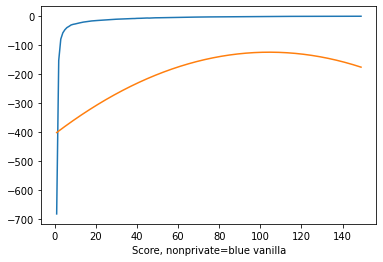

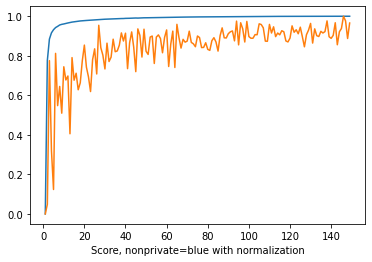

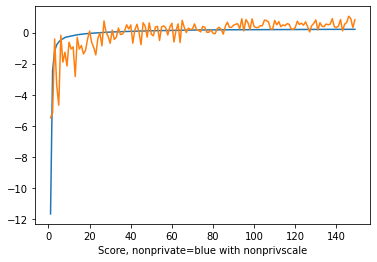

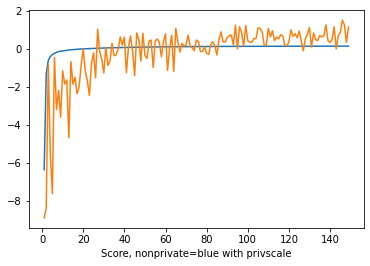

In [ ]:
plt.plot(cluster,nonpriv_score)
tmp = eq[0]*cluster*cluster
tmp += eq[1]*cluster
tmp += eq[2]
plt.plot(cluster,tmp)
plt.xlabel("Score, nonprivate=blue vanilla")
plt.show()
plt.plot(cluster,mms.fit_transform(pd.DataFrame(nonpriv_score)))
plt.plot(cluster,mms.fit_transform(pd.DataFrame(priv_score)))
plt.xlabel("Score, nonprivate=blue with normalization")
plt.show()
plt.plot(cluster,scale(pd.DataFrame(nonpriv_score),False))
plt.plot(cluster,scale(pd.DataFrame(priv_score),False))
plt.xlabel("Score, nonprivate=blue with nonprivscale")
plt.show()
plt.plot(cluster,scale(pd.DataFrame(nonpriv_score),True))
plt.plot(cluster,scale(pd.DataFrame(priv_score),True))
plt.xlabel("Score, nonprivate=blue with privscale")
plt.show()

In [ ]:
def func(x,a,b,c):
  return a* np.exp(-b*x)+c

In [ ]:
popt, pcov = scipy.optimize.curve_fit(func,cluster,priv_inertia)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


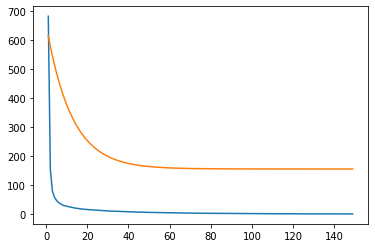

In [ ]:

plt.plot(cluster,nonpriv_inertia)
plt.plot(cluster,func(cluster,*popt))

In [ ]:
eq

(array([4.98327818e+02, 8.14828759e-02, 1.54827236e+02]),
 array([[1.33913650e+03, 2.22484975e-01, 6.14323330e+00],
        [2.22484975e-01, 8.20634926e-05, 2.37282371e-02],
        [6.14323330e+00, 2.37282371e-02, 3.47700888e+01]]))

In [ ]:
priv_inertia = np.array(priv_inertia)

In [ ]:
tmp = eq[0]*cluster*cluster
tmp += eq[1]*cluster
tmp += eq[2]
plt.plot(cluster,tmp)

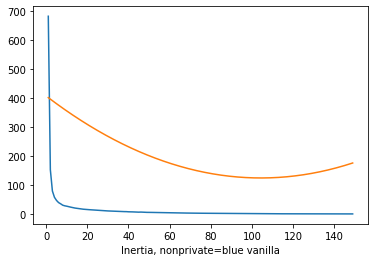

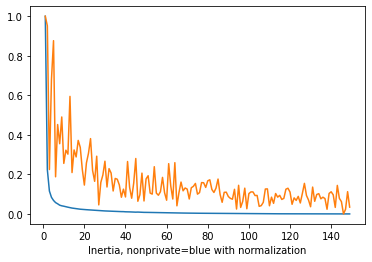

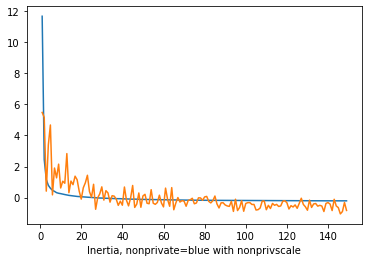

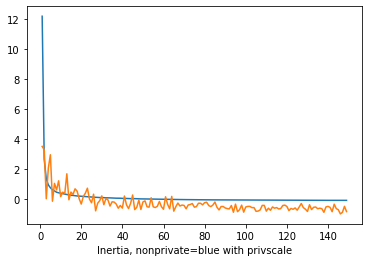

In [ ]:


plt.plot(cluster,nonpriv_inertia)
#plt.plot(cluster,priv_inertia)
plt.xlabel("Inertia, nonprivate=blue vanilla")
tmp = eq[0]*cluster*cluster
tmp += eq[1]*cluster
tmp += eq[2]
plt.plot(cluster,tmp)
plt.show()
plt.plot(cluster,mms.fit_transform(pd.DataFrame(nonpriv_inertia)))
plt.plot(cluster,mms.fit_transform(pd.DataFrame(priv_inertia)))
plt.xlabel("Inertia, nonprivate=blue with normalization")
plt.show()
plt.plot(cluster,scale(pd.DataFrame(nonpriv_inertia),False))
plt.plot(cluster,scale(pd.DataFrame(priv_inertia),False))
plt.xlabel("Inertia, nonprivate=blue with nonprivscale")
plt.show()
plt.plot(cluster,scale(pd.DataFrame(nonpriv_inertia),True))
plt.plot(cluster,scale(pd.DataFrame(priv_inertia),True))
plt.xlabel("Inertia, nonprivate=blue with privscale")
plt.show()

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
from sklearn.linear_model import LinearRegression

nonprivate_rgr= LinearRegression()
nonprivate_rgr.fit(X_train,y_train)
print("Non-private baseline R2 score: %.2f" % nonprivate_rgr.score(X_test, y_test))

dp_rgr = dp.LinearRegression(epsilon=1, bounds=(X_train.min(), X_train.max()))
dp_rgr.fit(X_train, y_train)

print("R2 score for epsilon= %.2f: %.2f" % (dp_rgr.epsilon, dp_rgr.score(X_test,y_test)))
